### Imports

Import dependencies and make a couple helper functions

In [21]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np
import sys

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12]

from wand import * #import the module here, so that it can be reloaded.

RESOLUTION = (1920,1440,3)

def captureImage(fname):
    img = cv2.imread(fname)
    if img.shape[:2] != RESOLUTION[:2]:
        img = cv2.resize(img,RESOLUTION[:2])
    return img

def drawImage(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Detection Masks

Introspect and edit detection masks and thresholds

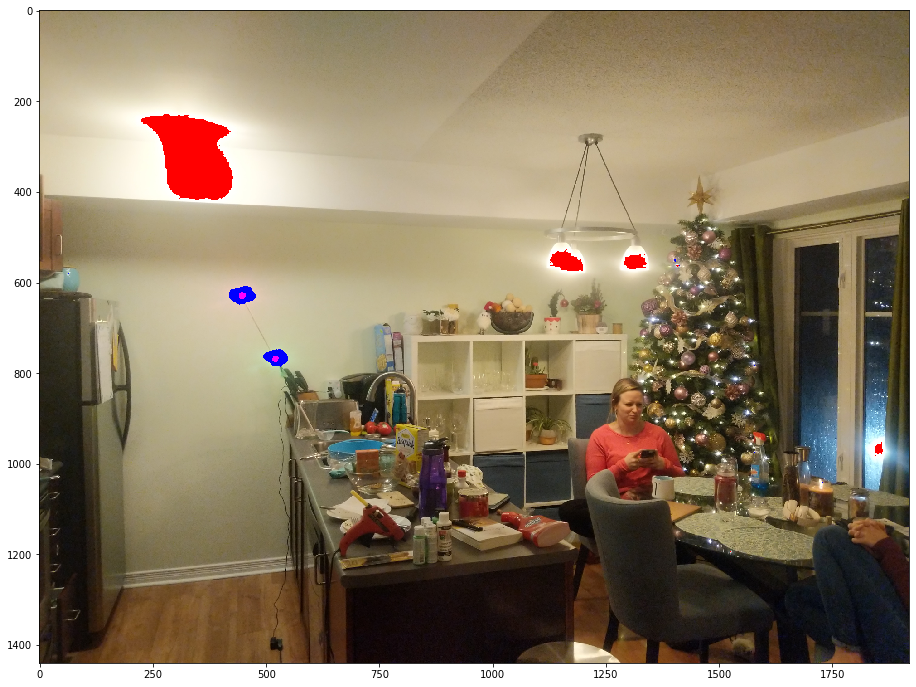

In [42]:
img = captureImage('wand_test.jpg')
wand = BallWand()
wand.visualizeMask(img)
drawImage(img)

### Verify

Test the final detector

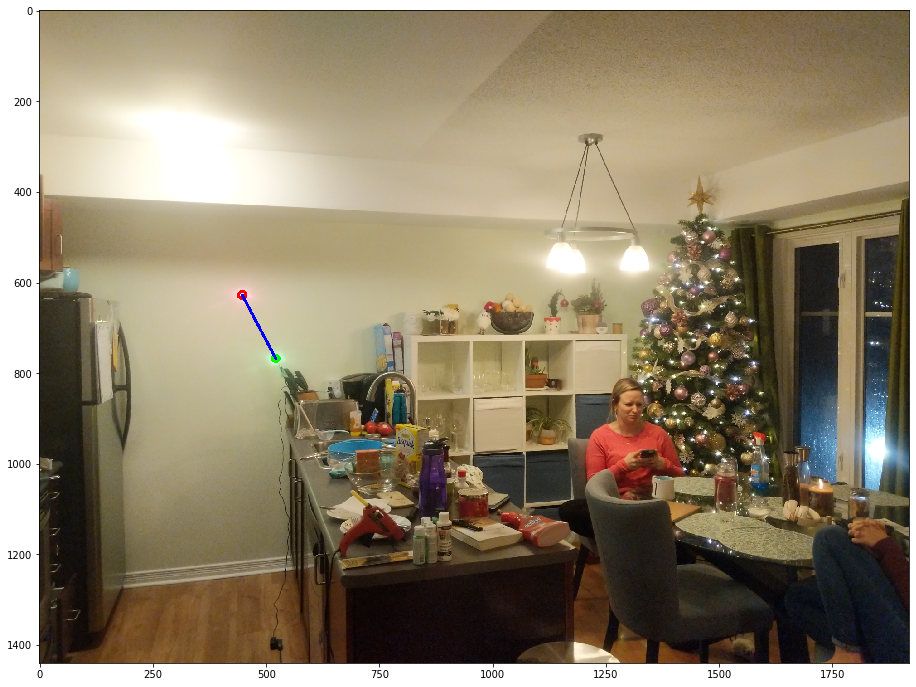

In [45]:
img = captureImage('wand_test.jpg')

wand = BallWand()
keypoints = wand.detect(img)
wand.draw(img,keypoints)

drawImage(img)